In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [11]:
orb = cv2.ORB_create()

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)



images = ['book1.jpg', '.book2.jpg', 'book3.jpg', 'book4.jpg', ] 

#나중에 test데이터가 들어오면 가장 비슷한 얘가 누군지 찾기 위해 db 저장
database_kp = []
database_desc = []
for name in images :
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    database_desc.append(desc)
    

In [13]:
test = cv2.imread("book1test.jpg", cv2.IMREAD_GRAYSCALE)
# corner 점에 대한 descripter를 다 계산해야 한다.
keypoints, desc = orb.detectAndCompute(test, None)

min_distance = 1000
idx = -1

# test가 누구랑 비슷한지 찾기 위함 (여기서는 4번 돌겠다.)
for i in range(len(images)) :   
    # 거리 계산 1번점이 몇번째 점과 매칭이 되어있다(매핑관계가 들어가있음.)
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    #상위 몇개만 써서 정확하게 검출하겠다.(필드마다 개수는 다를것!)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
        
    if(len(good_matches)) != 0 :
        distance /= len(good_matches)    
        
    if  min_distance > distance :
        # 찾았음
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\batch_distance.cpp:275: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'cv::batchDistance'


In [15]:
orb = cv2.ORB_create()

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)


images = ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg', ] 

database_kp = []
database_desc = []
for name in images :
    img = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
    keypoints, desc = orb.detectAndCompute(img, None)
    database_kp.append(keypoints)
    database_desc.append(desc)
    
    
    

In [21]:
test = cv2.imread("book1test.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

18.64
52.74
59.92
38.08


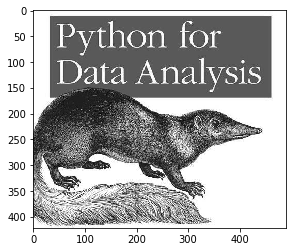

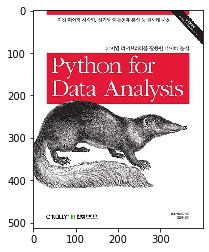

In [22]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [23]:
test = cv2.imread("book12.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

19.8
52.9
60.88
39.46


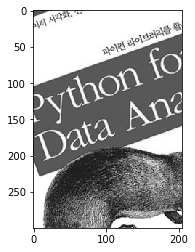

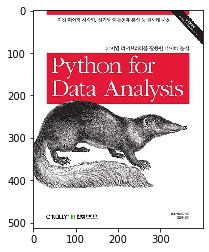

In [24]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [25]:
test = cv2.imread("book41.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

42.52
39.76
58.82
24.72


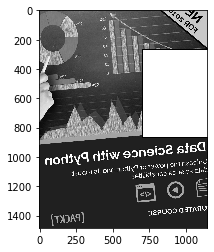

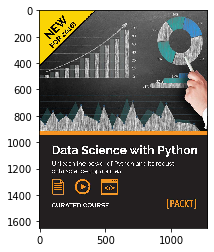

In [26]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

In [27]:
test = cv2.imread("book42.jpg", cv2.IMREAD_GRAYSCALE)
keypoints, desc = orb.detectAndCompute(test, None)

43.48
43.36
57.12
26.56


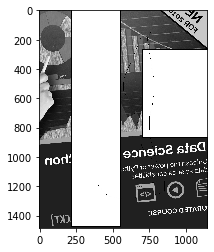

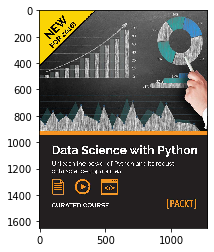

In [28]:
min_distance = 1000
idx = -1
for i in range(len(images)) :   
    matches = matcher.match(desc, database_desc[i])
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]
    
    distance = 0
    for d  in good_matches :
        distance += d.distance
    distance /= len(good_matches)    
    print(distance)
        
    if  min_distance > distance :
        min_distance = distance
        idx = i

imshow("", test  )
imshow("", cv2.imread(images[idx])      )

### 호모그래피
* 영상이미지에서 퍼스펙티브가 바뀌면서 vertex들에 대한 매칭(테스트 영상에 대해 매칭)
* 네 점을 찾아서 영상이 어디있는지 찾을 수 있음

pts1에는 첫번째 영상에서의 매칭된 점들에 대한 좌표점들을 뽑음(첫번째 이미지에서의 index에 대한 좌표를 가져옴)

In [34]:
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
    
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

In [39]:
# 그림 좌표에 대해 점들의 특징점 코너가 저장되어 있음.
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
# pts
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

# 왜 1이 들어가 있을까? 3차원으로 만들기 위함 50개에 대한 2차원데이터를 3차원으로!
# 매칭된다고 보고 ... 
print(pts1.shape)  # 50,1,2
print(pts2.shape)  # 50,1,2

print(pts1)

(50, 1, 2)
(50, 1, 2)
[[[141.00482  155.52002 ]]

 [[139.96802   55.296005]]

 [[134.36931   87.09122 ]]

 [[ 70.84801  167.61601 ]]

 [[143.07841   66.35521 ]]

 [[127.87201   63.936005]]

 [[134.78401  150.33601 ]]

 [[ 89.85601  162.43202 ]]

 [[128.56322   64.28161 ]]

 [[ 64.28161   68.42881 ]]

 [[141.69601  155.52002 ]]

 [[ 88.128006  62.208008]]

 [[143.42401   65.66401 ]]

 [[ 74.30401  103.68001 ]]

 [[126.48962  155.52002 ]]

 [[ 63.936005  69.12001 ]]

 [[ 74.4      176.40001 ]]

 [[126.14401  155.52002 ]]

 [[ 64.28161  145.15202 ]]

 [[134.78401   72.57601 ]]

 [[136.8      132.      ]]

 [[ 74.880005 175.68001 ]]

 [[136.51201  127.87201 ]]

 [[ 65.66401  157.24802 ]]

 [[ 74.64961  116.12161 ]]

 [[ 76.032005 115.77601 ]]

 [[ 76.72321  134.78401 ]]

 [[ 60.480007  77.76001 ]]

 [[145.15201   58.752007]]

 [[136.85762  147.22562 ]]

 [[ 70.50241  118.19521 ]]

 [[ 70.50241  114.04802 ]]

 [[ 66.35521  157.59363 ]]

 [[ 80.870415  64.28161 ]]

 [[122.42538   98.5375  ]]

In [41]:
# 카메라 퍼스펙티브 처리.평면이 어떻게 움직이게 됐는가 확안!
# perspective는3차원에서 발생
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# 3x3 행력
print(H) 
#회|전 정|보  | 이동정보

[[ 4.85610150e-01 -1.26423343e-01  1.16639863e+02]
 [ 3.62734153e-02  4.76039278e-01  1.58710108e+02]
 [-1.20390936e-04 -1.08741047e-04  1.00000000e+00]]


In [45]:
(h, w) = src1.shape[:2]
# 원본 영상의 좌표 4점이 어디로 매핑되는지 찾음
# H에 의해 점의 위치가 변환됨
corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)

print(corners1)
print(corners2)

[[[  0.   0.]]

 [[  0. 222.]]

 [[323. 222.]]

 [[323.   0.]]]
[[[116.63986 158.71011]]

 [[ 90.76499 270.93124]]

 [[261.93488 294.67987]]

 [[284.5573  177.32181]]]


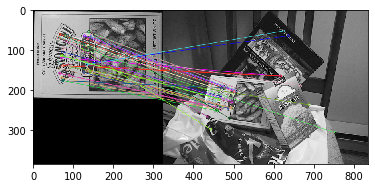

In [49]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None, 
                     flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

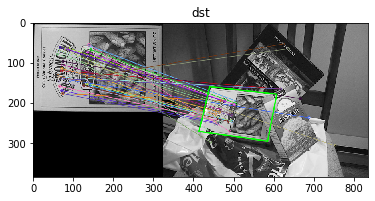

In [48]:
# np.float32([w, 0])의 의미는? 벡터를 더하는데 왜?  두행렬이 같다는 전제가 있다.그러나 다르다. 브로드캐스팅이 되기에
corners3 = corners2 + np.float32([w, 0]) 

#좌표 네점으로 네개의 선을 그려준다.
cv2.polylines(dst, [np.int32(corners3)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)

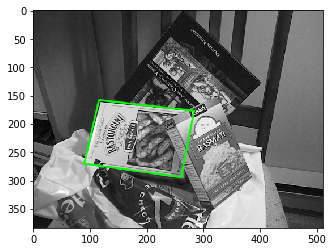

In [51]:
test = cv2.imread('box_in_scene.png')
cv2.polylines(test, [np.int32(corners2)], True, (0, 255,0), 2 , cv2.LINE_AA)

imshow("", test)

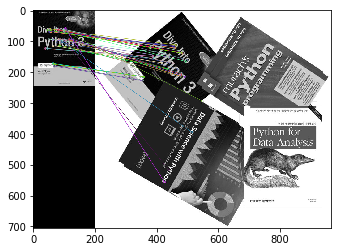

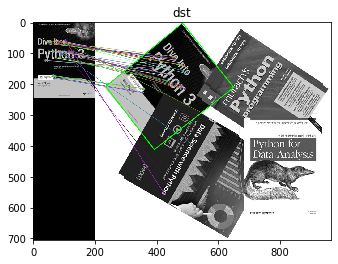

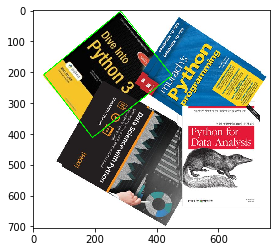

In [75]:
src1 = cv2.imread('book2.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('bookscene.jpg', cv2.IMREAD_GRAYSCALE)

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matches = matcher.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]

pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
(h, w) = src1.shape[:2]

corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None, 
                     flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow("", dst)

corners3 = corners2 + np.float32([w, 0]) 

cv2.polylines(dst, [np.int32(corners3)], True, (0, 255, 0), 2, cv2.LINE_AA)
imshow('dst', dst)

test = cv2.imread('bookscene.jpg')
cv2.polylines(test, [np.int32(corners2)], True, (0, 255,0), 2 , cv2.LINE_AA)

imshow("", test)

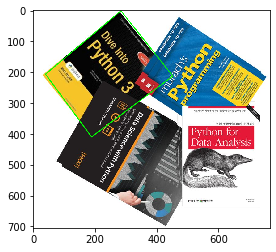

In [71]:
# 가려짐과 회전에도 굉장히 강인하다,
def findBook(query, scene) : 
    
    src1 = cv2.cvtColor(query, cv2.COLOR_BGR2GRAY)
    src2 = cv2.cvtColor(scene, cv2.COLOR_BGR2GRAY)
    
    keypoints1, desc1 = orb.detectAndCompute(src1, None)
    keypoints2, desc2 = orb.detectAndCompute(src2, None)

    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)
    good_matches = matches[:50]

    pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
    pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

    H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

    (h, w) = src1.shape[:2]
    corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
    corners2 = cv2.perspectiveTransform(corners1, H)
    
    return np.int32(corners2)



# 이미지가 너무 작아서 book1, book3, book4가 결과가 안나오는것같다.
q = cv2.imread('book2.jpg')
s = cv2.imread('bookscene.jpg')

corner = findBook(q, s)

cv2.polylines(s, [corner], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow("", s)

* affine transform : 2D 변환
* perspective tranform : 3D (원근)

### fashion mnist # 종류도 10개 
* 5개 학습 후 프리징
* 나머지는 DNN으로
* Data Augmentation으로 부풀려서 해도됨